In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# import the data
mean_BMI = pd.read_csv("Mean BMI among adults.csv")
depression = pd.read_csv("Population based prevalence of depression.csv")

In [8]:
# Take only the columns we need
mean_BMI_df = mean_BMI[['Unnamed: 0','2015','2015.1','2015.2']]

In [9]:
mean_BMI_df.head()

Unnamed: 0                                         2015  \
0          NaN   Mean BMI (kg/m&amp;#xb2,) (crude estimate)   
1          NaN                                   18+  years   
2      Country                                   Both sexes   
3  Afghanistan                             22.9 [21.6-24.3]   
4      Albania                             26.7 [25.9-27.5]   

                                        2015.1  \
0   Mean BMI (kg/m&amp;#xb2,) (crude estimate)   
1                                   18+  years   
2                                         Male   
3                             22.3 [19.8-24.8]   
4                             26.9 [25.8-28.0]   

                                        2015.2  
0   Mean BMI (kg/m&amp;#xb2,) (crude estimate)  
1                                   18+  years  
2                                       Female  
3                             23.6 [22.7-24.5]  
4                             26.4 [25.2-27.7]

In [12]:
# rename columns 
mean_BMI_df_columnNames = ['Country','mean_BMI_both_sexes','mean_BMI_male','mean_BMI_female']
mean_BMI_df.columns = mean_BMI_df_columnNames

In [14]:
mean_BMI_df.drop([0,1,2],inplace=True)

C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
mean_BMI_df.reset_index(inplace=True)


C:\Users\smartestpersonalive\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
mean_BMI_df.head()

Country mean_BMI_both_sexes     mean_BMI_male   mean_BMI_female
0  Afghanistan    22.9 [21.6-24.3]  22.3 [19.8-24.8]  23.6 [22.7-24.5]
1      Albania    26.7 [25.9-27.5]  26.9 [25.8-28.0]  26.4 [25.2-27.7]
2      Algeria    25.5 [24.5-26.4]  24.6 [23.3-25.8]  26.4 [25.0-27.7]
3      Andorra    27.0 [25.0-29.1]  27.6 [25.2-30.1]  26.5 [23.1-29.8]
4       Angola    22.9 [20.7-25.2]  22.1 [19.4-24.7]  23.8 [20.2-27.3]

In [22]:
BMI_bothSex = [a.split(" ")[0] for a in mean_BMI_df['mean_BMI_both_sexes']]
BMI_male = [b.split(" ")[0] for b in mean_BMI_df['mean_BMI_male']]
BMI_female = [c.split(" ")[0] for c in mean_BMI_df['mean_BMI_female']]


In [38]:
meanBMI_cleaned = pd.DataFrame({"Country": mean_BMI_df['Country'],
                               "BMI_bothSexes":BMI_bothSex,
                               "BMI_male":BMI_male,
                               "BMI_female":BMI_female})
print(meanBMI_cleaned.shape)
# Delete rows with no data
meanBMI_cleaned = meanBMI_cleaned[~meanBMI_cleaned["BMI_bothSexes"].isin(['No'])]

# check if changes are made
print(meanBMI_cleaned.shape)

(195, 4)
(191, 4)


In [43]:
# change data types from object to floats
meanBMI_cleaned["BMI_bothSexes"] = meanBMI_cleaned["BMI_bothSexes"].astype("float")
meanBMI_cleaned["BMI_male"] = meanBMI_cleaned["BMI_male"].astype("float")
meanBMI_cleaned["BMI_female"] = meanBMI_cleaned["BMI_female"].astype("float")

# meanBMI cleaned

In [45]:
print(meanBMI_cleaned.dtypes)
meanBMI_cleaned.head()

Country           object
BMI_bothSexes    float64
BMI_male         float64
BMI_female       float64
dtype: object


Country  BMI_bothSexes  BMI_male  BMI_female
0  Afghanistan           22.9      22.3        23.6
1      Albania           26.7      26.9        26.4
2      Algeria           25.5      24.6        26.4
3      Andorra           27.0      27.6        26.5
4       Angola           22.9      22.1        23.8

In [47]:
depression_columnNames = ['Country','Estimated_depression']
depression.columns = depression_columnNames

In [49]:
depression.drop([0], axis=0,inplace=True)

In [51]:
depression = depression.reset_index()

In [52]:
depression.drop(['index'],axis=1,inplace=True)

# Depression Cleaned

In [54]:
depression_df = depression

In [56]:
depression_df.head()

Country  Estimated_depression
0          Afghanistan                   3.3
1              Albania                   4.8
2              Algeria                   4.5
3               Angola                   3.6
4  Antigua and Barbuda                   5.1

In [57]:
# concat the two datasets
depression_BMI = pd.concat([depression_df, meanBMI_cleaned])

In [93]:
# group by country
Country_group = depression_BMI.groupby(['Country']).sum()

In [59]:
Country_group.head()

Estimated_depression  BMI_bothSexes  BMI_male  BMI_female
Country                                                               
Afghanistan                   3.3           22.9      22.3        23.6
Albania                       4.8           26.7      26.9        26.4
Algeria                       4.5           25.5      24.6        26.4
Andorra                       0.0           27.0      27.6        26.5
Angola                        3.6           22.9      22.1        23.8

In [119]:
not_in_BMI= Country_group.loc[Country_group['BMI_bothSexes'] == 0,:].index
not_in_depression = Country_group.loc[Country_group['Estimated_depression']==0,:].index

In [120]:
# Drop null data
zero_data = not_in_BMI.append(not_in_depression)
Country_group.drop(zero_data, axis=0,inplace=True)

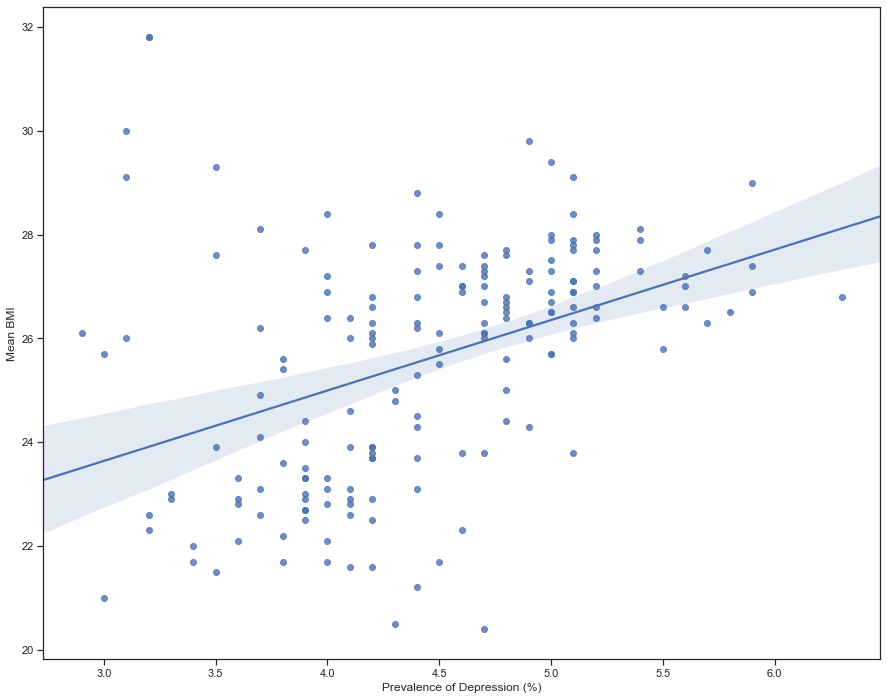

In [121]:
width=15
height = 12
plt.figure(figsize = (width,height))
sns.regplot(x='Estimated_depression', y='BMI_bothSexes', data=Country_group)
plt.xlabel('Prevalence of Depression (%)')
plt.ylabel("Total Mean BMI")

plt.show()

This plot shows the relationship between Prevalence of Depression (predictor variable) and the Mean BMI for each country, which is our target variable. We chose our target variable to be the mean BMI because this would be the outcome we are trying to predict. 

From this scatterplot, we can see that as the Prevalence of Depression increases, the mean BMI increases as well. This scatterplot gives as an initial indication that there is a positive linear relationship between depression levels and BMI ratings.  

In [75]:
Country_group.corr()

Estimated_depression  BMI_bothSexes  BMI_male  \
Estimated_depression              1.000000       0.406371  0.485215   
BMI_bothSexes                     0.406371       1.000000  0.956656   
BMI_male                          0.485215       0.956656  1.000000   
BMI_female                        0.294962       0.958639  0.834904   

                      BMI_female  
Estimated_depression    0.294962  
BMI_bothSexes           0.958639  
BMI_male                0.834904  
BMI_female              1.000000

In [82]:
from scipy import stats

In [83]:
pearson_coef, p_value = stats.pearsonr(Country_group['Estimated_depression'],Country_group['BMI_bothSexes'])
print(f"The p value is {p_value} and the pearson coefficient is {round(pearson_coef,3)}")

The p value is 1.3776380463975736e-08 and the pearson coefficient is 0.406


The p-value is less than 0.001 which means there is strong evidence that the correlation between depression percentage and the mean BMI is statistically significant.

The pearson coefficient is at around 0.406 which represents a moderately weak positive relationship. We can say that the percentage of prevalence of depression can potentially be a good predictor of the average BMIs of a country.

We can also see that with the positive correlation, if estimated depression increases, BMI of both sexes also increases

# Bins

In [84]:
bins = np.linspace(min(Country_group['Estimated_depression']),max(Country_group['Estimated_depression']),4)

Our dataset for "Estimated_depression"] has values ranging from 2.9% to 6.3% with 31 unique values. With this analysis, we want to find out the BMI difference between Countries with higher, medium, and lower depression percentages and to do that, we sliced our dataset into 3 bins of equal size using numpy's linspace function

In [95]:
# Set group names
BMIGroup_names = ['Low', "Medium", 'High']

Country_group['depressionBins'] = pd.cut(Country_group['Estimated_depression'],bins,labels=BMIGroup_names,include_lowest=True)
Country_group.head()

Estimated_depression  BMI_bothSexes  BMI_male  BMI_female  \
Country                                                                  
Afghanistan                   3.3           22.9      22.3        23.6   
Albania                       4.8           26.7      26.9        26.4   
Algeria                       4.5           25.5      24.6        26.4   
Andorra                       0.0           27.0      27.6        26.5   
Angola                        3.6           22.9      22.1        23.8   

            depressionBins  
Country                     
Afghanistan            Low  
Albania             Medium  
Algeria             Medium  
Andorra                NaN  
Angola                 Low

In [97]:
Country_group = Country_group[['Estimated_depression', "depressionBins" ,'BMI_bothSexes','BMI_male','BMI_female']]

In [108]:
# Check the number of countries placed in each bins
Country_group['depressionBins'].value_counts(sort = False)

Low        54
Medium    107
High       22
Name: depressionBins, dtype: int64

Looking at the value counts of the

Text(0, 0.5, 'Count')

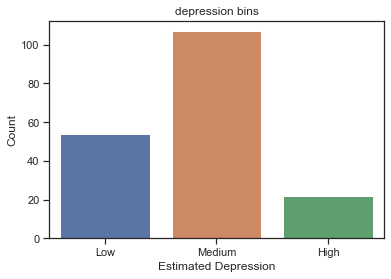

In [111]:
sns.set(style="ticks")
ax = sns.barplot(BMIGroup_names, Country_group['depressionBins'].value_counts(sort=False))

# Set labels and title
ax.set_title("depression bins")
ax.set_xlabel("Estimated Depression")
ax.set_ylabel("Count")

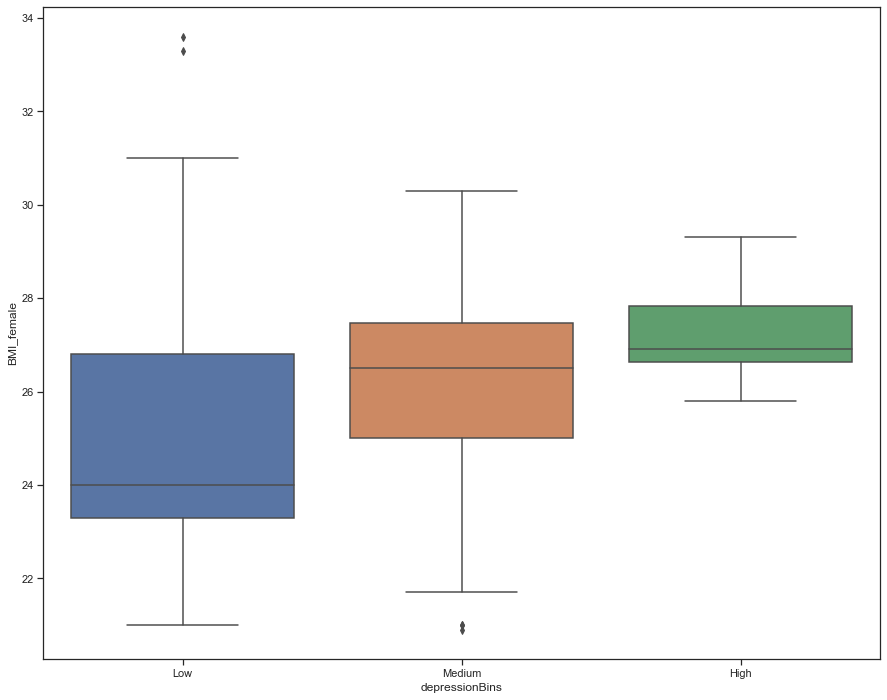

In [122]:
width=15
height = 12
plt.figure(figsize = (width,height))
sns.boxplot(x= 'depressionBins', y='BMI_female',data=Country_group)

In [149]:
Country_group_cat = Country_group[['depressionBins','BMI_bothSexes','BMI_male','BMI_female']]

In [150]:
Country_group_cat = Country_group_cat.reset_index()


In [152]:
Country_group_cat.drop(['Country'],axis=1,inplace=True)

In [153]:
Country_group_cat.groupby(['depressionBins']).mean()

BMI_bothSexes   BMI_male  BMI_female
depressionBins                                      
Low                 24.505660  23.839623   25.173585
Medium              25.813208  25.468868   26.170755
High                27.181818  27.068182   27.290909

From this data, we can see that depression levels that are classified as "High", on average, have the highest BMI ratings while "Medium" and "Low" have the second highest and lowest respectively.

This helps us understand that countries that have a higher percentage of prevalance of depression tend to have higher BMI averages within their populations.  

# ANOVA 
We will only look at BMI_bothSexes in this analysis
We will be using the ANOVA test to clarify the correlation between the different categories of depression levels we created earlier with "depressionBins". This test will return the F-test score and the p-value, with the F-test score describing the ratio of variation between the groups' mean over the variation within each of the sample groups. 

Our hypothesis is that depression does contribute to obesity and we perform an ANOVA test to prove the accuracy of the hypothesis.

In [154]:
grouped_anova_test = Country_group[['depressionBins','BMI_bothSexes']].groupby(['depressionBins'])

In [156]:
grouped_anova_test.mean()['BMI_bothSexes']

depressionBins
Low       24.505660
Medium    25.813208
High      27.181818
Name: BMI_bothSexes, dtype: float64

In [157]:
Country_group.head(10)

Estimated_depression depressionBins  BMI_bothSexes  \
Country                                                                   
Afghanistan                           3.3            Low           22.9   
Albania                               4.8         Medium           26.7   
Algeria                               4.5         Medium           25.5   
Angola                                3.6            Low           22.9   
Antigua and Barbuda                   5.1         Medium           26.6   
Argentina                             4.7         Medium           27.6   
Armenia                               5.0         Medium           26.5   
Australia                             5.9           High           27.4   
Austria                               5.1         Medium           26.0   
Azerbaijan                            4.6         Medium           26.9   

                     BMI_male  BMI_female poopybins  
Country                                              
Afghanistan              22.3        23.6        ye  
Albania                  26.9        26.4        ya  
Algeria                  24.6        26.4        yo  
Angola                   22.1        23.8        ye  
Antigua and Barbuda      25.6        27.7        ya  
Argentina                27.7        27.6        ya  
Armenia                  25.5        27.4        ya  
Australia                27.7        27.0      yeet  
Austria                  26.8        25.2        ya  
Azerbaijan               26.0        27.8        yo

In [158]:
# get values of method group
grouped_anova_test.get_group("Low")['BMI_bothSexes']

Country
Afghanistan                              22.9
Angola                                   22.9
Benin                                    23.3
Brunei Darussalam                        27.2
Burkina Faso                             22.1
Cambodia                                 22.0
Cameroon                                 24.0
Chad                                     21.5
Congo                                    22.9
Côte d'Ivoire                            23.6
Democratic People's Republic of Korea    24.1
Democratic Republic of the Congo         21.7
Egypt                                    29.3
Fiji                                     27.6
Gambia                                   23.5
Guatemala                                26.2
Guinea                                   22.7
Guinea-Bissau                            23.1
Honduras                                 26.4
Indonesia                                23.1
Iraq                                     28.1
Jordan                    

In [161]:
f_val,p_val = stats.f_oneway(grouped_anova_test.get_group('Low')['BMI_bothSexes'],\
                             grouped_anova_test.get_group('Medium')['BMI_bothSexes'],\
                            grouped_anova_test.get_group('High')['BMI_bothSexes'])
print(f"F-value = {f_val} and p-value = {p_val}")

F-value = 13.736481263000515 and p-value = 2.8327839167375136e-06


From this calculation, we can see a large F score (13.74), which means there is a large difference between the means and a certain statistical significance with a small p-value (2.83e-6)
